# Supplementary information - Effective mass in BiFeO<sub>3</sub>

<h3 align="center">J. Kane Shenton,<sup>&dagger;</sup><sup>&Dagger;</sup> David R. Bowler<sup>&dagger;</sup><sup>&sect;</sup> and Wei Li Cheah<sup>&Dagger;</sup></h3>



*<sup>&dagger;</sup> Department of Physics & Astronomy, University College London,Gower St, London, WC1E 6BT*  
*<sup>&sect;</sup>UCL Satellite, International Centre for Materials Nanoarchitectonics (MANA), National Institute for Materials Science (NIMS), 1-1 Namiki, Tsukuba, Ibaraki 305-0044, Japan*  
*<sup>&sect;</sup> London Centre for Nanotechnology, 17-19 Gordon St, London, WC1H 0AH*  
*<sup>&Dagger;</sup> Institute of High Performance Computing, A-STAR, Singapore* 

## List of figures

* [S1: KS orbitals at conduction band minimum](#fig-s1)
* [S2: Projected bands and DOS w.r.t. hydrostatic strain](#fig-s2)
* [S3: Effective mass w.r.t. hydrostatic strain](#fig-s3)
* [S4: Effective mass w.r.t. octahedral rotation](#fig-s4)
* [S5: Electronic band gap w.r.t. octahedral rotation](#fig-s5)
* [S6: Projected bands and DOS w.r.t. octahedral rotation (with and without SOC)](#fig-s6)
* [S7: Lowest unoccupied and highest occupied KS orbitals w.r.t. octahedral rotation ](#fig-s7)
* [S8: Projected bands and DOS w.r.t. octahedral translations ](#fig-s8)
* [S9: Effective mass w.r.t. octahedral translation](#fig-s9)
* [S10: Electronic band gap w.r.t. octahedral translation](#fig-s10)


In [10]:
from pymatgen.io.vasp import Vasprun
from pymatgen.io.vasp import Poscar
from pymatgen.electronic_structure.core import Spin, OrbitalType
from pymatgen import periodic_table
elementBi = periodic_table.Element("Bi")
elementFe = periodic_table.Element("Fe")
elementO  = periodic_table.Element("O")

import numpy as np
import math
import re
from tabulate import tabulate
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.gridspec import GridSpec
%matplotlib inline

# These are the "Tableau 20" colors as RGB.
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)
    
    
import os
from IPython.display import display, Image, HTML
from glob import glob
import re


## Relaxed phases of BFO

Here we consider 5 PBE+U relaxed BFO structures: $R3c$, $Pnma$, $P4mm$, $R\bar{3}c$ and $Pm\bar{3}m$. The relaxed structures, in their 40-atom pseudocubic setting can be found here:

* $R3c$: `relaxed_structures/structures/r3c_gaf_relaxed.vasp`
* $Pnma$: `relaxed_structures/structures/pnma_gaf_relaxed.vasp`
* $P4mm$: `relaxed_structures/structures/p4mm_caf_relaxed.vasp`
* $R\bar{3}c$: `relaxed_structures/structures/r-3c_gaf_relaxed.vasp`
* $Pm\bar{3}m$: `relaxed_structures/structures/pm-3m_gaf_relaxed.vasp`

Let's use pymatgen to display the structural parameters in a convenient way:

### Structures

#### $R3c$

In [187]:
r3c_struc = Poscar.from_file("relaxed_structures/structures/r3c_gaf_relaxed.vasp").structure
print("Spacegroup: ",r3c_struc.get_space_group_info())
print(r3c_struc)

Spacegroup:  ('R3c', 161)
Full Formula (Fe8 Bi8 O24)
Reduced Formula: FeBiO3
abc   :   8.012700   8.012695   8.012695
angles:  89.181046  89.181046  89.181046
Sites (40)
  #  SP           a         b         c
---  ----  --------  --------  --------
  0  Bi    0.538056  0.538056  0.538059
  1  Bi    0.538056  0.038056  0.038059
  2  Bi    0.038056  0.038056  0.538059
  3  Bi    0.038056  0.538056  0.038059
  4  Bi    0.038066  0.038066  0.038066
  5  Bi    0.038066  0.538066  0.538066
  6  Bi    0.538066  0.538066  0.038066
  7  Bi    0.538066  0.038066  0.538066
  8  O     0.701291  0.273154  0.499996
  9  O     0.701291  0.773154  0.999996
 10  O     0.201291  0.773154  0.499996
 11  O     0.201291  0.273154  0.999996
 12  O     0.273154  0.499993  0.701294
 13  O     0.273154  0.999993  0.201294
 14  O     0.773154  0.999993  0.701294
 15  O     0.773154  0.499993  0.201294
 16  O     0.499993  0.701291  0.273157
 17  O     0.499993  0.201291  0.773157
 18  O     0.999993  0.201291 

#### $Pnma$

In [191]:
pnma_struc = Poscar.from_file("relaxed_structures/structures/pnma_gaf_relaxed.vasp").structure
print("Spacegroup: ",pnma_struc.get_space_group_info())
print(pnma_struc)

Spacegroup:  ('Pnma', 62)
Full Formula (Fe8 Bi8 O24)
Reduced Formula: FeBiO3
abc   :   7.925600   7.925600   7.868300
angles:  89.999298  89.999298  87.591698
Sites (40)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Bi    0.5608  0.5424  0.5
  1  Bi    0.0608  0.0424  0.5
  2  Bi    0.0092  0.4908  0
  3  Bi    0.5092  0.9908  0
  4  Bi    0       0       0
  5  Bi    0.5     0.5     0
  6  Bi    0.5516  0.0516  0.5
  7  Bi    0.0516  0.5516  0.5
  8  O     0.3139  0.7085  0.5
  9  O     0.8139  0.2085  0.5
 10  O     0.3431  0.2377  0
 11  O     0.8431  0.7377  0
 12  O     0.7469  0.3339  0
 13  O     0.2469  0.8339  0
 14  O     0.7177  0.8047  0.5
 15  O     0.2177  0.3047  0.5
 16  O     0.5323  0.7186  0.7968
 17  O     0.0323  0.2186  0.7968
 18  O     0.833   0.5193  0.2968
 19  O     0.333   0.0193  0.2968
 20  O     0.833   0.5193  0.7032
 21  O     0.333   0.0193  0.7032
 22  O     0.5285  0.3238  0.2968
 23  O     0.0285  0.8238  0.2968
 24  O    

#### $P4mm$

In [192]:
p4mm_struc = Poscar.from_file("relaxed_structures/structures/p4mm_caf_relaxed.vasp").structure
print("Spacegroup: ",p4mm_struc.get_space_group_info())
print(p4mm_struc)

Spacegroup:  ('P4mm', 99)
Full Formula (Fe8 Bi8 O24)
Reduced Formula: FeBiO3
abc   :   7.507463   7.507467   9.756046
angles:  90.000000  90.000000  90.000000
Sites (40)
  #  SP           a         b         c
---  ----  --------  --------  --------
  0  Bi    0.75      0.25      0.285658
  1  Bi    0.75      0.75      0.285658
  2  Bi    0.25      0.25      0.785658
  3  Bi    0.25      0.75      0.785658
  4  Bi    0.75      0.25      0.785658
  5  Bi    0.75      0.75      0.785658
  6  Bi    0.25      0.25      0.285658
  7  Bi    0.25      0.75      0.285658
  8  Fe    0         0         0.999361
  9  Fe    0         0.5       0.999378
 10  Fe    0.5       0         0.499357
 11  Fe    0.5       0.5       0.499382
 12  Fe    0.5       0         0.999377
 13  Fe    0.5       0.5       0.999361
 14  Fe    0         0         0.499382
 15  Fe    0         0.5       0.499357
 16  O     0.749996  0         0.426424
 17  O     0.750005  0.5       0.426424
 18  O     0.250008  0        

#### $R\bar{3}c$

In [189]:
r_3c_struc = Poscar.from_file("relaxed_structures/structures/r-3c_gaf_relaxed.vasp").structure
print("Spacegroup: ",r_3c_struc.get_space_group_info())
print(r_3c_struc)

Spacegroup:  ('R-3c', 167)
Full Formula (Fe8 Bi8 O24)
Reduced Formula: FeBiO3
abc   :   7.893100   7.893100   7.893100
angles:  91.076797  91.076797  91.076797
Sites (40)
  #  SP         a       b       c
---  ----  ------  ------  ------
  0  Bi    0       0       0.5
  1  Bi    0       0.5     0
  2  Bi    0.5     0       0
  3  Bi    0.5     0.5     0.5
  4  Bi    0       0.5     0.5
  5  Bi    0       0       0
  6  Bi    0.5     0.5     0
  7  Bi    0.5     0       0.5
  8  O     0.5     0.2081  0.2919
  9  O     0.5     0.7081  0.7919
 10  O     0       0.2081  0.7919
 11  O     0       0.7081  0.2919
 12  O     0.2081  0.7919  0
 13  O     0.2081  0.2919  0.5
 14  O     0.7081  0.7919  0.5
 15  O     0.7081  0.2919  0
 16  O     0.2919  0       0.7081
 17  O     0.2919  0.5     0.2081
 18  O     0.7919  0       0.2081
 19  O     0.7919  0.5     0.7081
 20  O     0.2081  0       0.2919
 21  O     0.2081  0.5     0.7919
 22  O     0.7081  0       0.7919
 23  O     0.7081  0.5     

#### $Pm\bar{3}m$

In [188]:
pm_3m_struc = Poscar.from_file("relaxed_structures/structures/pm-3m_gaf_relaxed.vasp").structure
print("Spacegroup: ",pm_3m_struc.get_space_group_info())
print(pm_3m_struc)

Spacegroup:  ('Pm-3m', 221)
Full Formula (Fe8 Bi8 O24)
Reduced Formula: FeBiO3
abc   :   7.867139   7.867139   7.867139
angles:  90.000000  90.000000  90.000000
Sites (40)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Bi    0     0     0
  1  Bi    0     0.5   0
  2  Bi    0     0     0.5
  3  Bi    0     0.5   0.5
  4  Bi    0.5   0.5   0.5
  5  Bi    0.5   0     0.5
  6  Bi    0.5   0.5   0
  7  Bi    0.5   0     0
  8  O     0     0.25  0.25
  9  O     0     0.75  0.25
 10  O     0.75  0.5   0.75
 11  O     0.75  0     0.75
 12  O     0.75  0.5   0.25
 13  O     0.75  0     0.25
 14  O     0.75  0.75  0.5
 15  O     0.75  0.25  0.5
 16  O     0.75  0.75  0
 17  O     0.75  0.25  0
 18  O     0.25  0     0.75
 19  O     0.25  0.5   0.75
 20  O     0.5   0.75  0.25
 21  O     0.5   0.25  0.25
 22  O     0     0.25  0.75
 23  O     0     0.75  0.75
 24  O     0.25  0.25  0
 25  O     0.25  0.75  0
 26  O     0.25  0.25  0.5
 27  O     0.25  0.75  0.5
 28  O     0.25  0  

### Band-edge KS orbitals

#### Average over all k-points

The Kohn-Sham orbitals corresponding to the lowest unoccupied and highest occupied bands, averaged over all k-space, can be found in the directory: `relaxed_structures/ks-orbitals/all_kpoints`.


#### Special k-points

The Kohn-Sham orbitals corresponding to the lowest unoccupied band at the location in k-space of the band minimum are displayed below.

These correspond to the files:

* $R3c$:    `relaxed_structures/ks-orbitals/key_points/r3c_lumo_R.vasp`
* $P4mm$:   `relaxed_structures/ks-orbitals/key_points/p4mm_lumo_G.vasp`
* $Pnma$:   `relaxed_structures/ks-orbitals/key_points/pnma_lumo_R.vasp`
* $R\bar{3}c$: `relaxed_structures/ks-orbitals/key_points/r-3c_lumo_R.vasp`
* $Pm\bar{3}m$: `relaxed_structures/ks-orbitals/key_points/pm-3m_lumo_G.vasp`


##### S1: KS orbitals at conduction band minimum <a class="anchor" id="fig-s1"></a>

<table cellspacing="20" style="border:0px">
<tbody style="border:0px"><tr style="border:0px">
    <td style="border:0px">  <a class="reference external"><img alt="KS Orbital for U = 3 eV" src="relaxed_structures/ks-orbitals/key_points/r3c_lumo_R.png"></a>  <span class="raw-html"></span></td>
    <td style="border:0px">  <a class="reference external"><img alt="KS Orbital for U = 4 eV" src="relaxed_structures/ks-orbitals/key_points/p4mm_lumo_G.png"></a>  <span class="raw-html"></span></td>
    <td style="border:0px">  <a class="reference external"><img alt="KS Orbital for U = 5 eV" src="relaxed_structures/ks-orbitals/key_points/pnma_lumo_R.png"></a>  <span class="raw-html"></span></td>
</tr>
<tr style="border:0px">
    <td style="border:0px"> $R3c$ </td>
    <td style="border:0px"> $P4mm$ </td>
    <td style="border:0px"> $Pnma$ </td>
</tr>
<tr style="border:0px">
    <td style="border:0px">  <a class="reference external"><img alt="KS Orbital for U = 6 eV" src="relaxed_structures/ks-orbitals/key_points/r-3c_lumo_R.png"></a>  <span class="raw-html"></span></td>
    <td style="border:0px">  <a class="reference external"><img alt="KS Orbital for U = 7 eV" src="relaxed_structures/ks-orbitals/key_points/pm-3m_lumo_G.png"></a>  <span class="raw-html"></span></td>
</tr>
<tr style="border:0px">
    <td style="border:0px"> $R\bar{3}c$ </td>
    <td style="border:0px"> $Pm\bar{3}m$ </td>

</tr>
</tbody></table>


### Effective masses of the relaxed phases

The charge carrier effective masses quoted in the paper correspond to the smallest $m^*$ along the 'principle directions'. Here we read in the full effective mass tensors and print out the $m^*$ along different directions to get a sense of the anisotropy in $m^*$. 

We first define a class that reads in the output of the EMC code written by [Fonari and Sutton.](https://github.com/afonari/emc)

The outputs of the EMC code are the effective mass tensor, principle effective masses and principle directions.
The principle effective masses are the inverse of the eigenvalues of the effective mass tensor in the output. Equivalently, they are the eigenvalues of the inverse of the reported effective mass tensor. i.e. the reported tensor is in fact the inverse of the effective mass tensor.

In [2]:
class Emcout:
    def __init__(self, filename='emcpy.out'):
        re_tensor = re.compile("Effective mass tensor")
        re_princ  = re.compile("Principle effective masses and directions")
        with open(filename) as f:
            for line in f:
                if re_tensor.search(line):
                    blank=next(f)
                    tens1=next(f)
                    tens2=next(f)
                    tens3=next(f)
                if re_princ.search(line):
                    blank=next(f)
                    m0=float(next(f).split()[-1])
                    blank=next(f)
                    blank=next(f)
                    blank=next(f)
                    m1=float(next(f).split()[-1])
                    blank=next(f)
                    blank=next(f)
                    blank=next(f)
                    m2=float(next(f).split()[-1])

        tensor = np.array([[float(tens1.split()[0]) ,float(tens1.split()[1]), float(tens1.split()[2])],
                           [ float(tens2.split()[0]) ,float(tens2.split()[1]), float(tens2.split()[2])],
                           [ float(tens3.split()[0]) ,float(tens3.split()[1]), float(tens3.split()[2])]])
        principlemasses = np.array([m0, m1, m2])
        # Numpy array containing the full effective mass tensor
        self.tensor  = tensor
        # Principle effective masses
        self.principlemasses = principlemasses

In [12]:
phases = ["r3c",
         "r3c_soc",
         "r-3c",
         "pnma",
         "p4mm",
         "pm-3m",
         ]

titles = ["$R3c$",
          "$R3c$ SOC", # SOC => including spin-orbit coupling
          "$R\\bar{3}c$",
          "$Pnma$",
          "$P4mm$",
          "$Pm\\bar{3}m$",
         ]

#### Hole masses

In [7]:
# EMC outputs the _curvature_ tensor
vbcurvetensors = [Emcout("relaxed_structures/effective_mass_tensors/{}_hole.txt".format(phase)).tensor for phase in phases]
# VBM m* tensors (taking the inverse of the curvature tensor)
vbtensors = [np.linalg.inv(tensor) for tensor in vbcurvetensors]

In [8]:
x, y, z = np.eye(3)
r111 = np.ones(3) / np.sqrt(3.)
vbxmasses = [x.dot(tens.dot(x)) for tens in vbtensors]
vbymasses = [y.dot(tens.dot(y)) for tens in vbtensors]
vbzmasses = [z.dot(tens.dot(z)) for tens in vbtensors]
vb111masses = [r111.dot(tens.dot(r111)) for tens in vbtensors]

In [14]:
vb_principle_masses = np.array([np.linalg.eigvals(tens) for tens in vbtensors])
vb_principle_masses.sort()

headers = ["Phase",
           "m^*_x (m_0)", "m^*_y (m_0)", "m^*_z (m_0)",
           "m^*_{111} (m_0)",
           "m^*_1 (m_0)", "m^*_2 (m_0)", "m^*_3 (m_0)"]
table = zip(titles,
            vbxmasses, vbymasses, vbzmasses,
            vb111masses,
            vb_principle_masses.T[0], vb_principle_masses.T[1], vb_principle_masses.T[2])
print(tabulate(table, headers = headers, tablefmt="pipe", floatfmt=".3f"))

| Phase        |   m^*_x (m_0) |   m^*_y (m_0) |   m^*_z (m_0) |   m^*_{111} (m_0) |   m^*_1 (m_0) |   m^*_2 (m_0) |   m^*_3 (m_0) |
|:-------------|--------------:|--------------:|--------------:|------------------:|--------------:|--------------:|--------------:|
| $R3c$        |        -3.802 |        -0.894 |        -2.513 |            -2.538 |        -4.210 |        -2.331 |        -0.669 |
| $R3c$ SOC    |        -4.576 |        -1.075 |        -2.564 |            -4.032 |        -4.950 |        -2.511 |        -0.754 |
| $R\bar{3}c$  |        -0.757 |        -0.749 |        -0.736 |            -0.629 |        -0.812 |        -0.802 |        -0.628 |
| $Pnma$       |        -1.870 |        -1.919 |        -1.085 |            -1.396 |        -2.494 |        -1.434 |        -0.947 |
| $P4mm$       |        -0.539 |        -0.539 |        -5.152 |            -2.077 |        -5.152 |        -0.539 |        -0.539 |
| $Pm\bar{3}m$ |        -0.339 |        -0.339 |        -0.339 |     

#### Electron masses

In [15]:
cbcurvetensors = [Emcout("relaxed_structures/effective_mass_tensors/{}_elec.txt".format(phase)).tensor for phase in phases]
# CBM m* tensors (taking the inverse)
cbtensors = [np.linalg.inv(tensor) for tensor in cbcurvetensors]

In [16]:
x, y, z = np.eye(3)
r111 = np.ones(3) / np.sqrt(3.)
cbxmasses = [x.dot(tens.dot(x)) for tens in cbtensors]
cbymasses = [y.dot(tens.dot(y)) for tens in cbtensors]
cbzmasses = [z.dot(tens.dot(z)) for tens in cbtensors]
cb111masses = [r111.dot(tens.dot(r111)) for tens in cbtensors]

In [17]:
cb_principle_masses = np.array([np.linalg.eigvals(tens) for tens in cbtensors])
cb_principle_masses.sort()

In [19]:
headers = ["Phase", "m^*_x (m_0)", "m^*_y (m_0)", "m^*_z (m_0)",
           "m^*_{111} (m_0)", "m^*_1 (m_0)", "m^*_2 (m_0)", "m^*_3 (m_0)"]
table = zip(titles, cbxmasses, cbymasses, cbzmasses,
            cb111masses, cb_principle_masses.T[0], cb_principle_masses.T[1], cb_principle_masses.T[2])
print(tabulate(table, headers = headers, tablefmt="pipe", floatfmt=".3f"))

| Phase        |   m^*_x (m_0) |   m^*_y (m_0) |   m^*_z (m_0) |   m^*_{111} (m_0) |   m^*_1 (m_0) |   m^*_2 (m_0) |   m^*_3 (m_0) |
|:-------------|--------------:|--------------:|--------------:|------------------:|--------------:|--------------:|--------------:|
| $R3c$        |         3.375 |         3.381 |         3.388 |             3.055 |         3.055 |         3.542 |         3.548 |
| $R3c$ SOC    |         6.010 |         3.413 |        10.725 |             2.892 |         2.316 |         3.294 |        14.539 |
| $R\bar{3}c$  |         0.736 |         0.728 |         0.720 |             0.367 |         0.367 |         0.907 |         0.910 |
| $Pnma$       |         1.224 |         1.242 |         1.205 |             1.055 |         0.991 |         1.027 |         1.653 |
| $P4mm$       |         0.334 |         0.334 |         0.469 |             0.379 |         0.334 |         0.334 |         0.469 |
| $Pm\bar{3}m$ |         0.240 |         0.240 |         0.240 |     

## Geometric transformations

### Strain

#### Projected bands and DOS

The projected band and DOS figures can all be found at:
`transformations/strain/transformations/strain/strain_factor_?.???.png`

Three representative figures were chosen out of these to make up Figure 5b in the paper.

First let's label the images using imagemagick, and turn them into simple animations to better convey the change in the projected bands and DOS w.r.t. isotropic strain:

In [53]:
for t in np.arange(0.95, 1.05, 0.02):

    label = "{0:3.0f} \% strain ".format(100*(t-1))
    fin  = "transformations/strain/strain_factor_{0:2.3f}.png".format(t)
    fout  = "transformations/strain/strain_factor_{0:2.3f}_labelled.png".format(t)
    ! convert $fin \
          -gravity North   -background White -pointsize 40  -splice 0x14 \
          -annotate +0+50 "$label" $fout

In [54]:
# -------- Strain pbands and DOS gif -------- #
!convert  -layers TrimBounds \
          -loop 0 \
          -delay 80 \
          -dispose previous \
          transformations/strain/strain_factor_?.???_labelled.png \
          transformations/strain/strain.gif

##### S2: Projected bands and DOS w.r.t. hydrostatic strain <a class="anchor" id="fig-s2"></a>


<img src="pbands_legend.png" alt="Projected bands legend" style="width: 100px; float: left;" />
![Projected bands as a function of isotropic strain][strain] 

[strain]: transformations/strain/strain.gif

#### Effective mass

Electron and hole effective along the principle directions, for each strain value, are stored in the files `transformations/strain/effective_mass/LUMO.dat` and `transformations/strain/effective_mass/HOMO.dat` respectively. 

Below we extract and plot the m* as a function of strain, reproducing Figure 5a. in the paper.

##### S3: Effective mass w.r.t. hydrostatic strain <a class="anchor" id="fig-s3"></a>

|Strain (%) | m_e (m_0) | m_h (m_0)   |
---------------------------------------
|      -5.0 |      2.334|       -1.051|
|      -3.0 |      2.575|       -0.831|
|      -1.0 |      2.862|       -0.819|
|       0.0 |      3.017|       -0.763|
|       1.0 |      3.186|       -0.749|
|       3.0 |      0.596|       -0.757|
|       5.0 |      0.581|       -0.753|


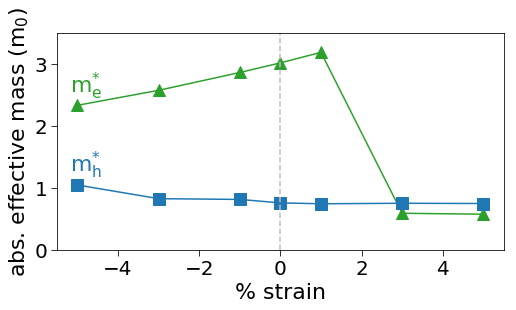

In [83]:

##############################
### --- Import data   ---###
holemass = np.loadtxt('transformations/strain/effective_mass/HOMO.dat')
electronmass = np.loadtxt('transformations/strain/effective_mass/LUMO.dat')

percentstrain = (electronmass[:,0] -1)*100

#########################################
### --- Plot m* vs percent strain  ---###
fig, ax1 = plt.subplots(figsize=(8,4))
ax1.plot(percentstrain, electronmass[:,3,],
         marker='^',
         color=tableau20[4],
         label='Electron mass (m$_0$)', markersize=12)
ax1.plot(percentstrain, -holemass[:,1],
         marker='s',
         color=tableau20[0],
         label='Hole mass (m$_0$)', markersize=12)

ax1.set_xlabel('% strain',fontsize=22)
ax1.set_ylabel('abs. effective mass (m$_0$)', fontsize=22)
ax1.tick_params(axis='both',
                which='major',
                labelsize=20,
                length=6)
ax1.tick_params(axis='both',
                which='minor',
                labelsize=20,
                length=4)

# annotate data points 
ax1.annotate(
    "$\mathrm{m_{e}^{*}}$", 
    xy = (percentstrain[0], electronmass[:,3,][0]), xytext = (25, 20),
    textcoords = 'offset points', ha = 'right', va = 'center',
    fontsize=22,
    color=tableau20[4])
ax1.annotate(
    "$\mathrm{m_{h}^{*}}$", 
    xy = (percentstrain[0], -holemass[:,1,][0]), xytext = (25, 20),
    textcoords = 'offset points', ha = 'right', va = 'center',
    fontsize=22,
    color=tableau20[0])

ax1.axvline(0.0, linestyle='--',color='0.75')

ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')

plt.ylim([0,3.5])
# fig.show()
########################################
# --- neatly print data --- #
print(39*"=")
print("|Strain (%) | m_e (m_0) | m_h (m_0)   |")
print(39*"-")
for i in range(len(percentstrain)):    
    print("|{0: 10.1f} |{1:11.3f}| {2:12.3f}|".format(percentstrain[i],
                                                      electronmass[:,3,][i],
                                                      holemass[:,1,][i]))
print(39*"=")

### Octahedral rotations

#### Effective mass & band gaps

##### S4: Effective mass w.r.t. octahedral rotation <a class="anchor" id="fig-s4"></a>

|Angle (deg) | m_e (m_0) | m_h (m_0)   |
---------------------------------------
|       0.0 |      0.184|       -0.374|
|       2.0 |      0.194|       -0.444|
|       4.0 |      0.216|       -0.381|
|       6.0 |      0.237|       -0.400|
|       8.0 |      0.255|       -0.422|
|      10.0 |      0.271|       -0.437|
|      12.0 |      0.275|       -0.464|
|      14.0 |      0.309|       -0.559|
|      16.0 |      0.357|       -0.579|
|      18.0 |      0.423|       -0.839|
|      20.0 |      0.511|       -0.722|
|      22.0 |      0.619|       -0.931|
|      24.0 |      0.745|       -1.096|
|      26.0 |      0.882|       -1.183|
|      28.0 |      1.009|       -1.201|


(0, 1.4)

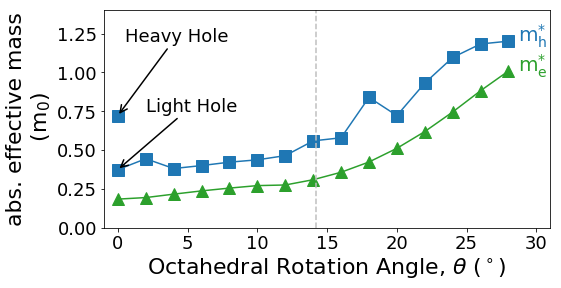

In [98]:
##############################
basedir = "transformations/octahedral_rotations/effective_mass/"
### --- Import data   ---###
holemass     = np.loadtxt(basedir + 'vb_mass.dat')
holemass_hh  = np.loadtxt(basedir + 'vb_mass_cubic_hh.dat')[0]
electronmass = np.loadtxt(basedir + 'cb_mass.dat')
angles = list(range(0,30,2))

##############################

# --- neatly print data --- #
print(39*"=")
print("|Angle (deg) | m_e (m_0) | m_h (m_0)   |")
print(39*"-")
for i in range(len(angles)):    
    print("|{0: 10.1f} |{1:11.3f}| {2:12.3f}|".format(angles[i],
                                                      electronmass[i],
                                                      holemass[i]))
print(39*"=")


##############################
### --- Plot m* vs theta.  ---###
fig, ax1 = plt.subplots(figsize=(8,4))
#Electron
ax1.plot(angles, electronmass,
         marker='^',
         color=tableau20[4],
         label='Electron mass (m$_0$)',
         markersize=12)
#Hole
ax1.plot(angles, -holemass,
         marker='s',
         color=tableau20[0],
         label='Hole mass (m$_0$)',
         markersize=12)
ax1.plot(0.0, -holemass_hh,
         marker='s',
         color=tableau20[0],
         markersize=12)
# Annotations
ax1.annotate('Light Hole',
            xy=(angles[0],-holemass[0]),
            xytext=(2, 0.75),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",
                           linewidth=1.5),
            fontsize=18,
            )
ax1.annotate('Heavy Hole',
            xy=(angles[0],-holemass_hh),
            xytext=(0.5, 1.2),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",
                           linewidth=1.5),
            fontsize=18,
            )

ax1.annotate(
    "$\mathrm{m_{e}^{*}}$", 
    xy = (angles[-1], electronmass[-1]), xytext = (10, 5),
    textcoords = 'offset points', ha = 'left', va = 'center',
    fontsize=20,
    color=tableau20[4])
ax1.annotate(
    "$\mathrm{m_{h}^{*}}$", 
    xy = (angles[-1], -holemass[-1]), xytext = (10, 5),
    textcoords = 'offset points', ha = 'left', va = 'center',
    fontsize=20,
    color=tableau20[0])



# axis labels
ax1.set_xlabel('Octahedral Rotation Angle, $\\theta$ ($^\circ$)',fontsize=22)
ax1.set_ylabel('abs. effective mass\n (m$_0$)', fontsize=22)

# bigger tick labels
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.tick_params(axis='both', which='minor', labelsize=10)


# DFT relaxed angle
ax1.axvline(14.2, linestyle='--',color='0.75')

# Experimental range
# ax1.axvspan(11, 14, alpha=0.5, color=tableau20[3])

# plot limits
ax1.set_xlim([-1,31])
ax1.set_ylim([0,1.4])

##############################


#### Band gap

##### S5: Electronic band gap w.r.t. octahedral rotation <a class="anchor" id="fig-s5"></a>

(0.5, 2)

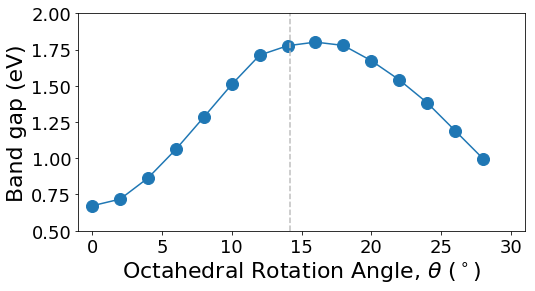

In [107]:
##############################
### --- Import data   ---###
bandgaps     = np.loadtxt('transformations/octahedral_rotations/effective_mass/bandgaps_jks.dat')
angles = list(range(0,30,2))
##############################

##############################
### --- Plot band gaps vs theta.  ---###
fig, ax1 = plt.subplots(figsize=(8,4))
#band gap
ax1.plot(angles, bandgaps,
         marker='o',
#          color=tableau20[4],
         label='Band gap',
         markersize=12)

# axis labels
ax1.set_xlabel('Octahedral Rotation Angle, $\\theta$ ($^\circ$)',fontsize=22)
ax1.set_ylabel('Band gap (eV)', fontsize=22)

# bigger tick labels
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.tick_params(axis='both', which='minor', labelsize=10)


# DFT relaxed angle
ax1.axvline(14.2, linestyle='--',color='0.75')

# plot limits
ax1.set_xlim([-1,31])
ax1.set_ylim([0.5,2])

##############################

#### Projected Bands and DOS with and without spin-orbit coupling

The projected band and DOS figures can all be found at:
`transformations/octahedral_rotations/rotangle_??/theta_??.png`, for the non-SOC case, and at `transformations/octahedral_rotations/spin_orbit_coupling/SOC_theta_??.png` for the SOC case.

First let's label the images using imagemagick, and turn them into simple animations to better convey the change in the projected bands and DOS w.r.t. octahedral rotations:

In [ ]:
# -------- No spin-orbit coupling (SOC) -------- #
!convert  -layers TrimBounds \
          -loop 0 \
          -delay 80 \
          -dispose previous \
          transformations/octahedral_rotations/rotangle_??/theta_??.png\
          transformations/octahedral_rotations/rotation_pbands.gif
            

In [43]:
# -------- with SOC -------- #
!convert  -layers TrimBounds \
          -loop 0 \
          -delay 80 \
          -dispose previous \
          transformations/octahedral_rotations/spin_orbit_coupling/SOC_theta_??.png\
          transformations/octahedral_rotations/spin_orbit_coupling/SOC_rotation_pbands.gif

##### S6: Projected bands and DOS w.r.t. octahedral rotation (with and without SOC) <a class="anchor" id="fig-s6"></a>

<img src="pbands_legend.png" alt="Projected bands legend" style="width: 100px; float: left;" />


| Without SOC        | Including SOC           |
| ------------- |:-------------:|
| ![Projected bands as a function of octahedral rotation (no SOC)][no_soc]      | ![Projected bands as a function of octahedral rotation (SOC)][soc] |


[no_soc]: transformations/octahedral_rotations/rotation_pbands.gif?2
[soc]: transformations/octahedral_rotations/spin_orbit_coupling/SOC_rotation_pbands.gif?2

#### Band-edge KS orbitals

In addition to the projected band structure, it is also instructive to examine the contribution to the charge density coming from certain bands; i.e. the Kohn-Sham (KS) orbitals. 

The highest occupied KS orbital for each rotation angle can be found in the files:
`transformations/octahedral_rotations/rotangle_??/homo_allk.vasp`.

The lowest unoccupied KS orbital for each rotation angle can be found in:
`transformations/octahedral_rotations/rotangle_??/lumo_allk.vasp`.

They can be opened using `VMD`, `VESTA` etc. VMD has the benefit of being easily scriptable. Using such a vmd script, the following animations were produced:

##### S7: Lowest unoccupied and highest occupied KS orbitals w.r.t. octahedral rotation <a class="anchor" id="fig-s7"></a>

Here purple, gold and red spheres represent Bi, Fe and O atoms respectively. The KS isosurface is shown as a blue mesh.


| Highest occupied KS        | Lowest unoccupied KS          |
| ------------- |:-------------:|
| ![gif showing HOMO w.r.t octahedral rotations][homo]      | ![gif showing LUMO w.r.t octahedral rotations][lumo] |

[homo]: transformations/octahedral_rotations/homo_rotations.gif
[lumo]: transformations/octahedral_rotations/lumo_rotations.gif

### Octahedral translations

#### Projected bands and DOS

#####  $\theta=0^{\circ}$

The images can all be found at:
`transformations/octahedral_translations/theta_0/theta0_T_???.png`

First let's label the images using imagemagick, and turn them into a simple animation to better convey the change in the projected bands and DOS w.r.t. octahedral translations:

In [34]:
for t in range(0,40,4):
    dr = 0.62 / 36
    label = "T = {0:2.2f} Å".format(dr*t)
    fin  = "transformations/octahedral_translations/theta_0/theta0_T_{0:03d}.png".format(t)
    fout = "transformations/octahedral_translations/theta_0/theta0_T_{0:03d}_labelled.png".format(t)
    ! convert $fin \
          -gravity North   -background White -pointsize 40  -splice 0x14 \
          -annotate +0+50 "$label" $fout

In [36]:
!convert  -layers TrimBounds -loop 0 \
          -delay 80 \
          -dispose previous \
          transformations/octahedral_translations/theta_0/theta0_T_???_labelled.png \
          transformations/octahedral_translations/theta_0/T_theta0.gif

#####  $\theta=14^{\circ}$

The images can all be found at:
`transformations/octahedral_translations/theta_14/theta14_T_??.png`

First let's label the images using imagemagick, and turn them into a simple animation to better convey the change in the projected bands and DOS w.r.t. octahedral translations:

In [37]:
for t in range(0,40,4):
    dr = 0.62 / 36
    label = "T = {0:2.2f} Å".format(dr*t)
    fin  = "transformations/octahedral_translations/theta_14/theta14_T_{0:02d}.png".format(t)
    fout = "transformations/octahedral_translations/theta_14/theta14_T_{0:02d}_labelled.png".format(t)
    ! convert $fin \
          -gravity North   -background White -pointsize 40  -splice 0x14 \
          -annotate +0+50 "$label" $fout

In [39]:
!convert  -layers TrimBounds \
          -loop 0 \
          -delay 80 \
          -dispose previous \
          transformations/octahedral_translations/theta_14/theta14_T_??_labelled.png \
          transformations/octahedral_translations/theta_14/T_theta14.gif

##### S8: Projected bands and DOS w.r.t. octahedral translations <a class="anchor" id="fig-s8"></a>

<img src="pbands_legend.png" alt="Projected bands legend" style="width: 100px; float: left;" />

| $\theta=0^{\circ}$        | $\theta=14^{\circ}$           |
| ------------- |:-------------:|
| ![alt text][theta0]      | ![alt text][theta14] |

[theta0]: transformations/octahedral_translations/theta_0/T_theta0.gif?4
[theta14]: transformations/octahedral_translations/theta_14/T_theta14.gif?4

#### Effective mass

##### S9: Effective mass w.r.t. octahedral translation <a class="anchor" id="fig-s9"></a>

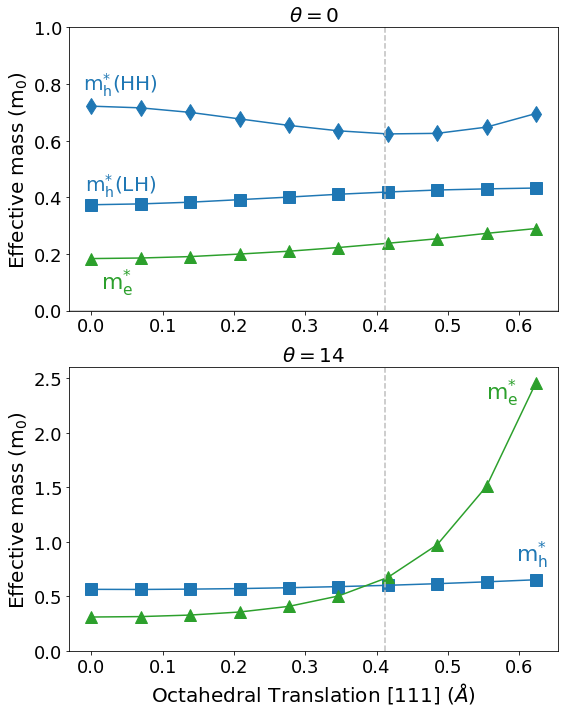

In [152]:
##############################
### --- Import data   ---###
basedir = "transformations/octahedral_translations/"
# The equilibrium translation of Fe is:
eq_translation = 0.412115 #\AA
# heavy hole
holemass0     = np.loadtxt(basedir+'theta_0/effective_mass/vb_mass.dat')[:,1]
# light hole
holemassLH0     = np.loadtxt(basedir+'theta_0/effective_mass/vb_mass_2.dat')[:,1]
electronmass0 = np.loadtxt(basedir+'theta_0/effective_mass/cb_mass.dat')[:,3]
bandgaps0     = np.loadtxt(basedir+'theta_0/effective_mass/bandgaps.dat') # jks script

holemass14     = np.loadtxt(basedir+'theta_14/effective_mass/vb_mass.dat')[:,1]
electronmass14 = np.loadtxt(basedir+'theta_14/effective_mass/cb_mass.dat')[:,3]
bandgaps14     = np.loadtxt(basedir+'theta_14/effective_mass/bandgaps.dat') # jks script


# [111] translations of octahedra in [\AA]
transs = [ 0.        ,  0.06928203,  0.13856406,  0.2078461 ,  0.27712813,
           0.34641016,  0.41569219,  0.48497423,  0.55425626,  0.62353829,]

##############################

##############################
### --- Plot m* vs theta.  ---###
fig, [ax1, ax2] = plt.subplots(2,figsize=(8,10), sharex=True)
######################
# Theta = 0 
######################
ax1.plot(transs, -holemass0,  marker='d',
         color=tableau20[0],
         label='Heavy Hole mass (m$_0$)',
         markersize=12)
ax1.plot(transs, -holemassLH0,marker='s',
         color=tableau20[0],
         label='Light Hole mass (m$_0$)',
         markersize=12)
ax1.plot(transs, electronmass0, marker='^',
         color=tableau20[4],
         label='Electron mass (m$_0$)',
         markersize=12)

ax1.annotate(
    "$\mathrm{m_{e}^{*}}$", 
    xy = (transs[1], electronmass0[1]), xytext = (-40, -25),
    textcoords = 'offset points', ha = 'left', va = 'center',
    fontsize=22,
    color=tableau20[4])
ax1.annotate(
    "$\mathrm{m_{h}^{*}}$(HH)", 
    xy = (transs[1], -holemass0[1]), xytext = (-20, 10),
    textcoords = 'offset points', ha = 'center', va = 'bottom',
    fontsize=20,
    color=tableau20[0])
ax1.annotate(
    "$\mathrm{m_{h}^{*}}$(LH)", 
    xy = (transs[1], -holemassLH0[1]), xytext = (-20, 5),
    textcoords = 'offset points', ha = 'center', va = 'bottom',
    fontsize=20,
    color=tableau20[0])

ax1.axhline(0.0, linestyle='-',color='0.75')



######################
# Theta = 14
######################
ax2.plot(transs, -holemass14,
         marker='s',
         color=tableau20[0],
         label='Hole mass (m$_0$)',
         markersize=12)
ax2.plot(transs, electronmass14,
         marker='^',
         color=tableau20[4],
         label='Electron mass (m$_0$)',
         markersize=12)

ax2.annotate(
    "$\mathrm{m_{e}^{*}}$", 
    xy = (transs[-1], electronmass14[-1]), xytext = (-50, -10),
    textcoords = 'offset points', ha = 'left', va = 'center',
    fontsize=22,
    color=tableau20[4])
ax2.annotate(
    "$\mathrm{m_{h}^{*}}$", 
    xy = (transs[-1], -holemass14[-1]), xytext = (-20, 25),
    textcoords = 'offset points', ha = 'left', va = 'center',
    fontsize=22,
    color=tableau20[0])

for ax in [ax1, ax2]:
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.tick_params(axis='both', which='minor', labelsize=10)
    # DFT relaxed translation
    ax.axvline(eq_translation, linestyle='--',color='0.75')
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    
    
ax1.set_ylim([0,1.0])
ax2.set_ylim([0,2.6])
ax2.set_xlabel('Octahedral Translation [111] ($\AA$)',fontsize=20)
ax1.set_ylabel('Effective mass (m$_0$)', fontsize=20)
ax2.set_ylabel('Effective mass (m$_0$)', fontsize=20)

ax1.set_title("$\\theta=0$", fontsize=20)
ax2.set_title("$\\theta=14$", fontsize=20)
fig.tight_layout()
# plt.savefig('images/m_eff_vs_trans14.pdf',format='pdf', bbox_inches='tight')
# fig.show()
##############################

#### Band gaps

##### S10: Electronic band gap w.r.t. octahedral translation <a class="anchor" id="fig-s10"></a>

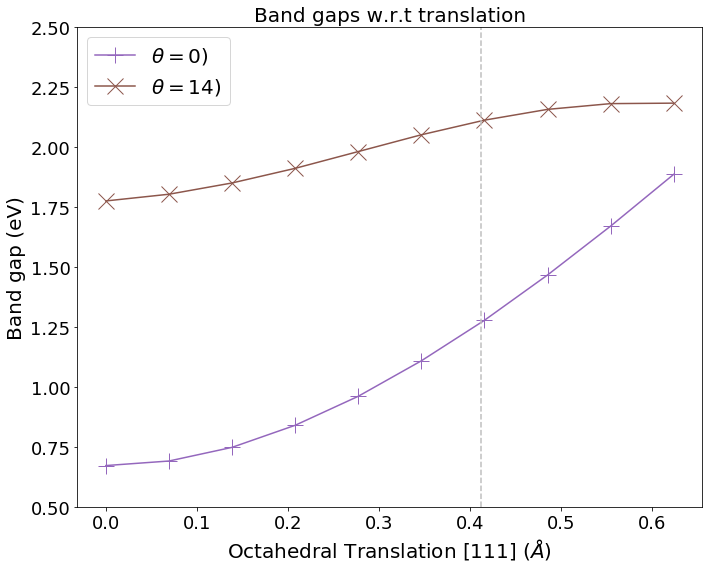

In [3]:
# The equilibrium translation of Fe is:
eq_translation = 0.412115 #\AA

##############################
### --- Import data   ---###
basedir = "transformations/octahedral_translations/"
bandgaps0     = np.loadtxt(basedir+'theta_0/effective_mass/bandgaps.dat') # jks script
bandgaps14     = np.loadtxt(basedir+'theta_14/effective_mass/bandgaps.dat') # jks script


# [111] translations of octahedra in [\AA]
transs = [ 0.        ,  0.06928203,  0.13856406,  0.2078461 ,  0.27712813,
           0.34641016,  0.41569219,  0.48497423,  0.55425626,  0.62353829,]

##############################

##############################
### --- Plot m* vs theta.  ---###
fig, ax = plt.subplots(1,figsize=(10,8))
######################
# Theta = 0 
######################
ax.plot(transs, bandgaps0,
        marker='+',
        color=tableau20[8],
        label='$\\theta = 0$)',
        markersize=16)
######################
# Theta = 14
######################
ax.plot(transs, bandgaps14,
         marker='x',
         color=tableau20[10],
         label='$\\theta=14$)',
         markersize=16)
# DFT relaxed translation
ax.axvline(eq_translation, linestyle='--',color='0.75')


ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_ylim([0.5,2.5])
ax.set_xlabel('Octahedral Translation [111] ($\AA$)',fontsize=20)
ax.set_ylabel('Band gap (eV)', fontsize=20)

ax.set_title("Band gaps w.r.t translation", fontsize=20)
ax.legend(fontsize=20)
fig.tight_layout()
##############################